# Seaborn Exercise 1

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as mtick

In [128]:
sns.set_theme(
    context="notebook", style="darkgrid", palette="bright",
    rc=dict([("figure.figsize", (8, 6))])
)

In [129]:
df = pd.read_csv("data/fifa.csv", index_col=0)

In [130]:
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,27,1987-06-24,169,67,Argentina,FC Barcelona,...,76,NaN,25,21,20,6,11,15,14,8
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29,1985-02-05,185,80,Portugal,Real Madrid,...,85,NaN,22,31,23,7,11,15,14,11
2,9014,https://sofifa.com/player/9014/arjen-robben/15...,A. Robben,Arjen Robben,30,1984-01-23,180,80,Netherlands,FC Bayern München,...,80,NaN,29,26,26,10,8,11,5,15
3,41236,https://sofifa.com/player/41236/zlatan-ibrahim...,Z. Ibrahimović,Zlatan Ibrahimović,32,1981-10-03,195,95,Sweden,Paris Saint-Germain,...,91,NaN,25,41,27,13,15,10,9,12
4,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,28,1986-03-27,193,92,Germany,FC Bayern München,...,37,NaN,25,25,25,87,85,92,90,86


In [132]:
df.isnull().any().any()

np.True_

In [133]:
df.dropna(axis=1, inplace=True)

In [134]:
df.isnull().any().any()

np.False_

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16155 entries, 0 to 16154
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   sofifa_id                   16155 non-null  int64 
 1   player_url                  16155 non-null  object
 2   short_name                  16155 non-null  object
 3   long_name                   16155 non-null  object
 4   age                         16155 non-null  int64 
 5   dob                         16155 non-null  object
 6   height_cm                   16155 non-null  int64 
 7   weight_kg                   16155 non-null  int64 
 8   nationality                 16155 non-null  object
 9   overall                     16155 non-null  int64 
 10  potential                   16155 non-null  int64 
 11  value_eur                   16155 non-null  int64 
 12  wage_eur                    16155 non-null  int64 
 13  player_positions            16155 non-null  object


NoneType

In [135]:
df.duplicated().any()

np.False_

In [137]:
df.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'overall', 'potential',
       'value_eur', 'wage_eur', 'player_positions', 'preferred_foot',
       'international_reputation', 'weak_foot', 'skill_moves', 'work_rate',
       'body_type', 'real_face', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'defending_marking', 'defending_standing_tackle',
       'defendin

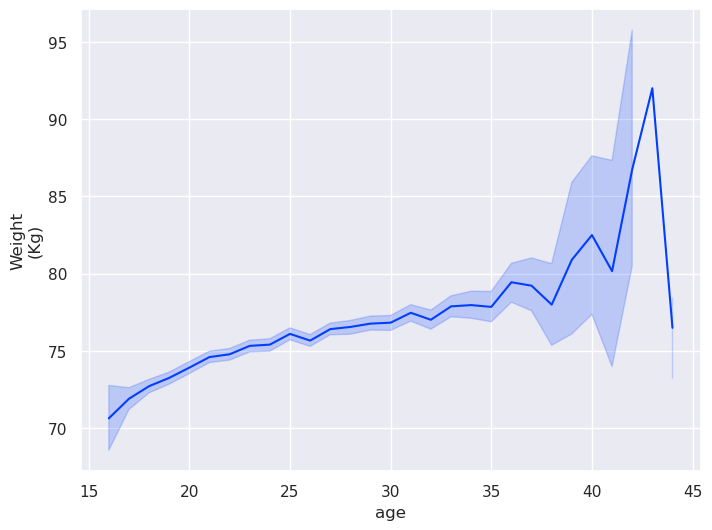

In [136]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(data=df, ax=ax, x="age", y="weight_kg")

ax.set_ylabel("Weight\n(Kg)");

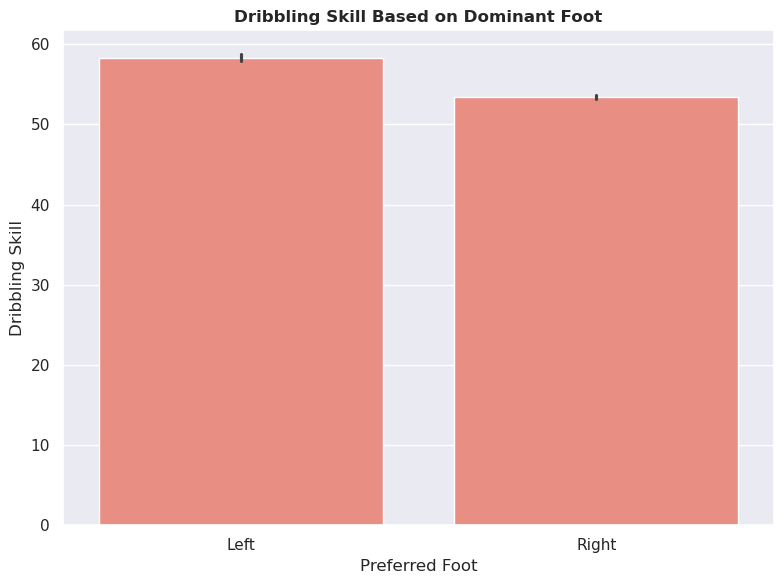

In [138]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(data=df, x="preferred_foot", y="skill_dribbling", color="salmon")

ax.set_title("Dribbling Skill Based on Dominant Foot", fontweight="bold")
ax.set(xlabel="Preferred Foot", ylabel="Dribbling Skill")

fig.tight_layout()

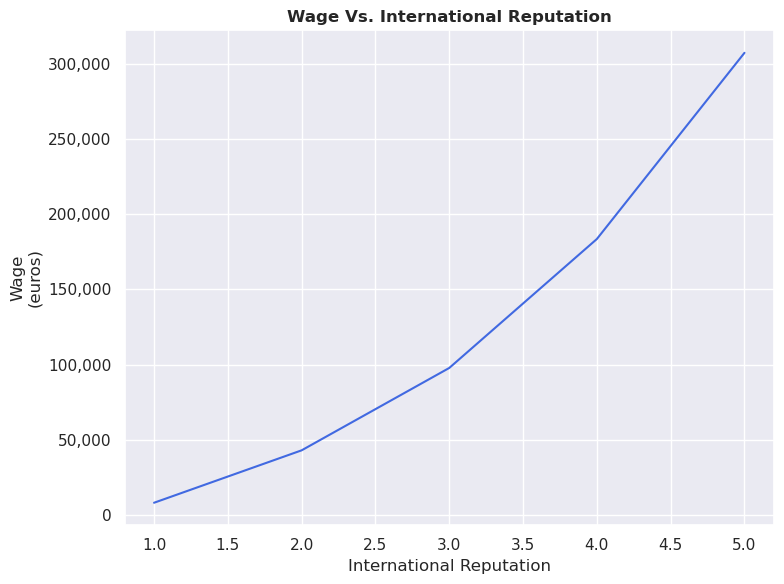

In [139]:
fig, ax = plt.subplots(figsize=(8, 6))
graph = sns.lineplot(
    data=df,
    x="international_reputation",
    y="wage_eur",
    errorbar=None,
    color="royalblue",
)

ax.set_title("Wage Vs. International Reputation", fontweight="bold")
ax.set_ylabel("Wage\n(euros)")
ax.set_xlabel("International Reputation")

# formatting major tick labels for y axis
graph.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"{x:,.0f}"))

fig.tight_layout()

In [140]:
df["body_type"].unique()

array(['Normal', 'Lean', 'Stocky'], dtype=object)

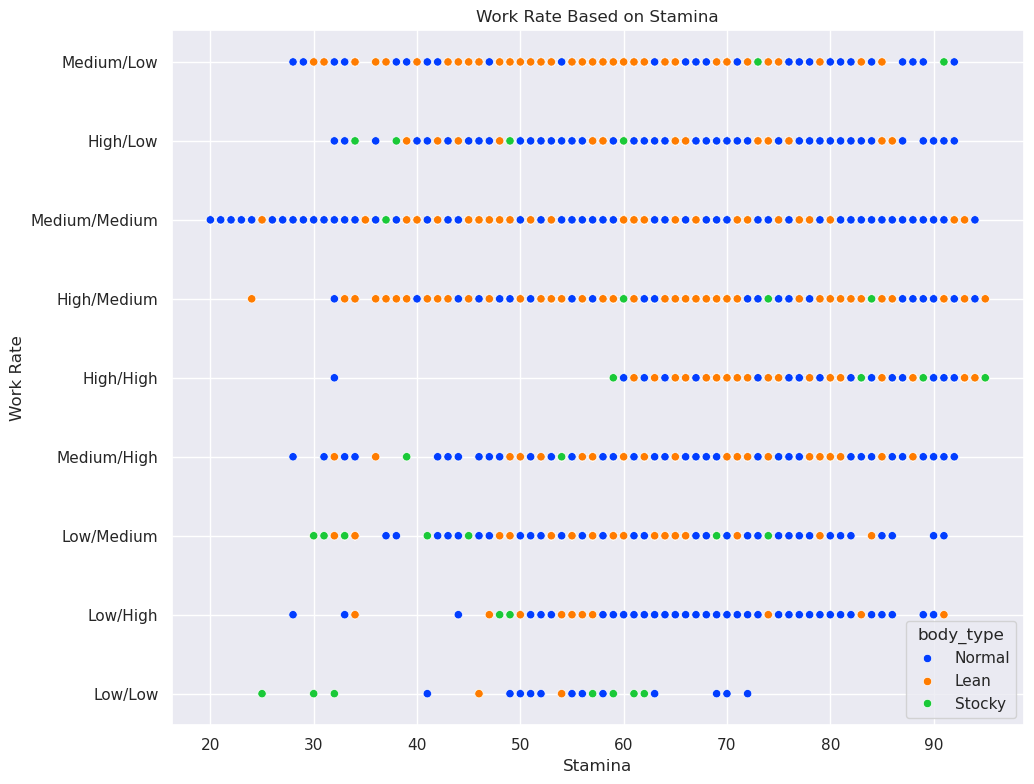

In [165]:
fig, ax = plt.subplots(figsize=(10.5, 8))
graph = sns.scatterplot(data=df, x="power_stamina", y="work_rate", hue="body_type", ax=ax)
sns.move_legend(graph, loc="lower right")
ax.set(
    xlabel="Stamina",
    ylabel="Work Rate",
    title="Work Rate Based on Stamina"
)

fig.tight_layout()